<a href="https://colab.research.google.com/github/Rafael-ORibeiro/Google-Colab/blob/main/K_mean_e_RegressaoLog%C3%ADstica(BreastCancer).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-mean e Regressão Logística para classificar o dataset Breast Cancer

* Utilizarei o dataset Breast Cancer que está no sklearn.datasets que é uma base de dados com informações de exames de pacientes, diagnosticando-os com câncer de mama malígno ou benígno

* Vou utilizar dois algorítmos, o K-mean(aprendizagem não supervisionada) e a Regressão Logística(Aprendizagem supervisionada, para classificar essa base de dados.

* Vou calcular o número de clusters que dividirão essa base de dados para a utilização do K-means

* Por fim vou avaliar os dois modelos

###Importando bibliotecas e carregando o dataset

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


####Carregando dataset
* Carregando dataset, sem o alvo, pois utilizarei primeiro o kmeans

In [ ]:
df = pd.DataFrame(load_breast_cancer().data, columns=load_breast_cancer().feature_names)

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
#O Dataset não possui dados faltantes e inicialmente vou trabalhar com todas a variáveis

#### Verificando a quantidade ideal de clusters para a base

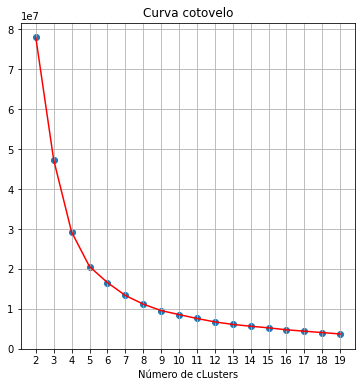

In [ ]:
x = []
y = []
for i in range(2,20):
  kmeans= KMeans(n_clusters=i)
  y.append(kmeans.fit(df).inertia_)
  x.append(i)

plt.figure(figsize=(6,6))
plt.scatter(x,y)
plt.plot(x,y,color='red')
plt.title('Curva cotovelo')
plt.xlabel('Número de cLusters')
plt.xticks(x)
plt.grid()
plt.show()



* Para essa base, o ideal seria 5 clusters, que corresponde ao ponto no gráfico em que a partir dele, a diferença entre a distância dos outros pontos é praticamente a mesma.

In [ ]:
kmeans= KMeans(n_clusters=5,random_state=42)

In [ ]:
kmeans.fit(df)

KMeans(n_clusters=5, random_state=42)

* Criando um data frame com os clusters kmeams e o target da base de dados

In [ ]:
df_clusters = pd.DataFrame({'clusters':kmeans.labels_,'real':load_breast_cancer().target})

In [ ]:
df_clusters.head()

,clusters,real
0,1,0
1,1,0
2,1,0
3,4,0
4,1,0


In [ ]:
df_clusters.clusters.value_counts()

4    231
2    184
1     71
0     70
3     13
Name: clusters, dtype: int64

In [ ]:
df_clusters.real.value_counts()

1    357
0    212
Name: real, dtype: int64

###Análise da concentração, de 0 - malígno e 1 - benígno, em cada cluster





In [ ]:
for i in range(0,5):
  
  print(70*'-')
  print(30*' ',f'Cluster {i}')
  print(70*'-')
  #print(df_clusters[df_clusters.clusters== i].real.value_counts())
  indices = df_clusters[df_clusters.clusters== i].real.value_counts().index
  cluster_ = df_clusters[df_clusters.clusters== i].real.value_counts()
  total = cluster_.sum()
  print(f'Total de entradas: {total}')
  for indice in indices:
    porcentagem = round((cluster_[indice]/total)*100,2)
    print(f'Classificação {indice}: {cluster_[indice]}, que corresponde a {porcentagem}% das entradas. ')
 


  print(70*'-','\n',70*'*','\n\n')
  

----------------------------------------------------------------------
                               Cluster 0
----------------------------------------------------------------------
Total de entradas: 70
Classificação 0: 67, que corresponde a 95.71% das entradas. 
Classificação 1: 3, que corresponde a 4.29% das entradas. 
---------------------------------------------------------------------- 
 ********************************************************************** 


----------------------------------------------------------------------
                               Cluster 1
----------------------------------------------------------------------
Total de entradas: 71
Classificação 0: 71, que corresponde a 100.0% das entradas. 
---------------------------------------------------------------------- 
 ********************************************************************** 


----------------------------------------------------------------------
                               Cluster 2
---

* os clusters classificados em 0,1 e 3 são, na base real, de classificação 0 e o 2, apesar de ter uma quantidade substâncial de classificação 0, e 4  podem ser considerados,na base real, de classificação 1
* Levando em consideração a abservação acima, criarei outra coluna,'previsao_kmeans' ,sintetizando a classificação em 0 e 1.

In [ ]:

coluna = []
for cl in df_clusters['clusters']:
  if cl == 2 or cl == 4:
    coluna.append(1)
  else:
    coluna.append(0)

df_clusters['previsao_kmeans'] = coluna

In [ ]:
df_clusters

,clusters,real,previsao_kmeans
0,1,0,0
1,1,0,0
2,1,0,0
3,4,0,1
4,1,0,0
...,...,...,...
564,1,0,0
565,1,0,0
566,0,0,0
567,1,0,0


###Avaliando o modelo k-mean

In [ ]:
from sklearn import metrics

In [ ]:
metrics.confusion_matrix(df_clusters['real'],df_clusters['previsao_kmeans'])

array([[151,  61],
       [  3, 354]])

In [ ]:
print(metrics.classification_report(df_clusters['real'],df_clusters['previsao_kmeans']))

              precision    recall  f1-score   support

           0       0.98      0.71      0.83       212
           1       0.85      0.99      0.92       357

    accuracy                           0.89       569
   macro avg       0.92      0.85      0.87       569
weighted avg       0.90      0.89      0.88       569



##Concluindo a análise do k-mean
* Obtivemos uma acurácia de 89%, mas com relação ao total de casos de câncer do tipo maligno, o erro está muito alto, temos um recall indicando que o modelo acertou 71% do total de casos classificados como maligno no target do dataset. Mesmo acertando o total de casos benignos em 99%, temos que focar em aumentar o recall dos casos malignos para reduzir o número de pacientes que, infelizmente, deixariam de receber um possível tratamento.

#Regressão Logística

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
x_ = load_breast_cancer().data
y_ = load_breast_cancer().target
x_train,x_test,y_train,y_test= train_test_split(x_,y_,test_size=0.3,random_state=42)

In [ ]:
rlog = LogisticRegression()

In [ ]:
rlog.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
!pip install scikit-plot

In [ ]:
y_pred = rlog.predict(x_test)
y_pred_train = rlog.predict(x_train)


In [ ]:
print('*Avaliação do Treino*')
print(metrics.classification_report(y_train,y_pred_train))

*Avaliação do Treino*
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       149
           1       0.94      0.96      0.95       249

    accuracy                           0.94       398
   macro avg       0.94      0.93      0.94       398
weighted avg       0.94      0.94      0.94       398



In [ ]:
print('*Avaliação do Teste*')
print(metrics.classification_report(y_test,y_pred))

*Avaliação do Teste*
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [ ]:
metrics.confusion_matrix(y_test,y_pred)

array([[ 59,   4],
       [  1, 107]])

#Concluindo a análise da regressão logística

* Temos aqui um modelo, em regra, estável, pois obteve os resultados de previsão de teste e do próprio treinamento com valores bem próximos.
* Obtivemos uma acurácia nos testes de 97% e um recall de 94% nos casos do tipo maligno, obtendo com isso uma super melhora na classificação desse data set, contra 71% do modelo com o k-means, mostrando um modelo muito bom para esse dataset, no qual temos que nos preocupar em reduzir o erro nos casos malígnos.
* Com relação a classificação dos casos benígnos,o recall se manteve,99%, o que é muito bom também.
